In [2]:
import numpy as np
import sys 
import os
import matplotlib.pyplot as plt
#from utils import *
import copy
#import models
import cv2
#from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
#import skimage.io as io
#import skimage.transform as trans
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler 
from keras import backend as keras
import keras.backend.tensorflow_backend as K

Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "/home/swha/.conda/envs/research_filament/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/home/swha/.conda/envs/research_filament/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/home/swha/.conda/envs/research_filament/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/home/swha/.conda/envs/research_filament/lib/python3.6/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "/home/swha/.conda/envs/research_filament/lib/python3.6/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: libcublas.so.10.0: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [3]:
import tensorflow as tf

ImportError: Traceback (most recent call last):
  File "/home/swha/.conda/envs/research_filament/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/home/swha/.conda/envs/research_filament/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/home/swha/.conda/envs/research_filament/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/home/swha/.conda/envs/research_filament/lib/python3.6/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "/home/swha/.conda/envs/research_filament/lib/python3.6/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: libcublas.so.10.0: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [5]:
img_width = 96
img_height = 96
img_depth = 16

box_list = ['box01/','box02/']
aug_list = [0,90,180,270]

label_dir_pre = '/home/swha/filament/data/label/'
img_dir_pre = '/home/swha/filament/data/density_smooting_plot_5/'
tmp_img = []
tmp_label = []

val_box_num = 'box02/'
val_sub_num = 'subbox02'
val_peak_num = '0'

val_label_dir = label_dir_pre + val_box_num + val_sub_num +'/' + val_peak_num + '/whole/'
val_img_dir =  img_dir_pre + val_box_num + val_sub_num + '/' + val_peak_num + '/'
val_label_tmp = []
val_img_tmp = []

train_data_list = []
val_data_list = []

for box_num in box_list:
    for sub_num in os.listdir(label_dir_pre + box_num):
        peak_list = os.listdir(label_dir_pre + box_num + sub_num + '/')
        for peak_num in peak_list:
            label_dir = label_dir_pre + box_num + sub_num + '/' + peak_num + '/whole/'
            img_dir = img_dir_pre + box_num + sub_num + '/' + peak_num + '/'

            # validation 이면 따로 뽑기
            #print(box_num,sub_num,peak_num)
            if(box_num == val_box_num and sub_num == val_sub_num and peak_num == val_peak_num):
      
                for aug_dir in aug_list:
                    os.chdir(val_label_dir+str(aug_dir)+'/')
                    for nn,_ in enumerate(os.listdir(val_label_dir + str(aug_dir) + '/')):
                        val_label_tmp.append(cv2.resize(cv2.imread(val_label_dir + str(aug_dir) + '/' + str(nn) + '.png',cv2.IMREAD_GRAYSCALE),(img_width,img_height)))
                        
                    val_data_name = str("box_num " + str(box_num) + " sub_box " + str(sub_num) + " peak_num " + str(peak_num) + " aug_dir " + str(aug_dir))
                    val_data_list.append(val_data_name)
                    
                    for nn,_ in enumerate(os.listdir(val_label_dir + 'z/'+ str(aug_dir) + '/')):
                        val_label_tmp.append(cv2.resize(cv2.imread(val_label_dir + 'z/'+ str(aug_dir) + '/'+ str(nn) + '.png',cv2.IMREAD_GRAYSCALE),(img_width,img_height)))
      
                    val_data_name = str("box_num " + str(box_num) + " sub_box " + str(sub_num) + " peak_num " + str(peak_num) + " aug_dir " + str(aug_dir) + 'with z')
                    val_data_list.append(val_data_name)
                    

                    os.chdir(val_img_dir+str(aug_dir)+'/')
                    for nn,_ in enumerate(os.listdir(val_img_dir + str(aug_dir) + '/')):
                        val_img_tmp.append(cv2.resize(cv2.imread(val_img_dir + str(aug_dir) + '/' + str(nn) + '.png',cv2.IMREAD_GRAYSCALE),(img_width,img_height)))
                    for nn,_ in enumerate(os.listdir(img_dir + 'z/'+ str(aug_dir) + '/')):
                        val_img_tmp.append(cv2.resize(cv2.imread(val_img_dir + 'z/'+ str(aug_dir) + '/' + str(nn) + '.png',cv2.IMREAD_GRAYSCALE),(img_width,img_height)))

            else:
                # train data set
                
                for aug_dir in aug_list:
                    os.chdir(label_dir+str(aug_dir)+'/')
                    for nn,_ in enumerate(os.listdir(label_dir + str(aug_dir) + '/')):
                        tmp_label.append(cv2.resize(cv2.imread(label_dir + str(aug_dir) + '/' + str(nn) + '.png',cv2.IMREAD_GRAYSCALE),(img_width,img_height)))
                    
                    train_data_name = str("box_num " + str(box_num) + " sub_box " + str(sub_num) + " peak_num " + str(peak_num) + " aug_dir " + str(aug_dir))
                    train_data_list.append(train_data_name)
                    
                    for nn,_ in enumerate(os.listdir(label_dir + 'z/'+ str(aug_dir) + '/')):
                        tmp_label.append(cv2.resize(cv2.imread(label_dir + 'z/'+ str(aug_dir) + '/'+ str(nn) + '.png',cv2.IMREAD_GRAYSCALE),(img_width,img_height)))
                    
                    train_data_name = str("box_num " + str(box_num) + " sub_box " + str(sub_num) + " peak_num " + str(peak_num) + " aug_dir " + str(aug_dir) + "with z")
                    train_data_list.append(train_data_name)


                    os.chdir(img_dir+str(aug_dir)+'/')
                    for nn,_ in enumerate(os.listdir(img_dir + str(aug_dir) + '/')):
                        tmp_img.append(cv2.resize(cv2.imread(img_dir + str(aug_dir) + '/' + str(nn) + '.png',cv2.IMREAD_GRAYSCALE),(img_width,img_height)))
                    for nn,_ in enumerate(os.listdir(img_dir + 'z/'+ str(aug_dir) + '/')):
                        tmp_img.append(cv2.resize(cv2.imread(img_dir + 'z/'+ str(aug_dir) + '/' + str(nn) + '.png',cv2.IMREAD_GRAYSCALE),(img_width,img_height)))

NameError: name 'cv2' is not defined

In [3]:
train_data_list

['box_num box01/ sub_box subbox08 peak_num 0 aug_dir 0',
 'box_num box01/ sub_box subbox08 peak_num 0 aug_dir 0with z',
 'box_num box01/ sub_box subbox08 peak_num 0 aug_dir 90',
 'box_num box01/ sub_box subbox08 peak_num 0 aug_dir 90with z',
 'box_num box01/ sub_box subbox08 peak_num 0 aug_dir 180',
 'box_num box01/ sub_box subbox08 peak_num 0 aug_dir 180with z',
 'box_num box01/ sub_box subbox08 peak_num 0 aug_dir 270',
 'box_num box01/ sub_box subbox08 peak_num 0 aug_dir 270with z',
 'box_num box01/ sub_box subbox08 peak_num 2 aug_dir 0',
 'box_num box01/ sub_box subbox08 peak_num 2 aug_dir 0with z',
 'box_num box01/ sub_box subbox08 peak_num 2 aug_dir 90',
 'box_num box01/ sub_box subbox08 peak_num 2 aug_dir 90with z',
 'box_num box01/ sub_box subbox08 peak_num 2 aug_dir 180',
 'box_num box01/ sub_box subbox08 peak_num 2 aug_dir 180with z',
 'box_num box01/ sub_box subbox08 peak_num 2 aug_dir 270',
 'box_num box01/ sub_box subbox08 peak_num 2 aug_dir 270with z',
 'box_num box01/ sub

In [4]:
val_data_list

['box_num box02/ sub_box subbox02 peak_num 0 aug_dir 0',
 'box_num box02/ sub_box subbox02 peak_num 0 aug_dir 0with z',
 'box_num box02/ sub_box subbox02 peak_num 0 aug_dir 90',
 'box_num box02/ sub_box subbox02 peak_num 0 aug_dir 90with z',
 'box_num box02/ sub_box subbox02 peak_num 0 aug_dir 180',
 'box_num box02/ sub_box subbox02 peak_num 0 aug_dir 180with z',
 'box_num box02/ sub_box subbox02 peak_num 0 aug_dir 270',
 'box_num box02/ sub_box subbox02 peak_num 0 aug_dir 270with z']

In [5]:
label_train = np.array(tmp_label)/255.
img_train = np.array(tmp_img)

label_val = np.array(val_label_tmp)/255.
img_val = np.array(val_img_tmp)

In [6]:
img_train = img_train.reshape([-1,96,96,96])
label_train = label_train.reshape([-1,96,96,96])

img_val = img_val.reshape([-1,96,96,96])
label_val = label_val.reshape([-1,96,96,96])

In [7]:
label_train = label_train.reshape([-1,img_depth,img_height,img_width])
img_train = img_train.reshape([-1,img_depth,img_height,img_width])

label_val = label_val.reshape([-1,img_depth,img_height,img_width])
img_val = img_val.reshape([-1,img_depth,img_height,img_width])


label_train = np.expand_dims(label_train,axis=-1)
img_train = np.expand_dims(img_train,axis=-1)

label_val = np.expand_dims(label_val,axis=-1)
img_val = np.expand_dims(img_val,axis=-1)

In [21]:
print(img_train.shape,img_val.shape)

(192, 16, 96, 96, 1) (48, 16, 96, 96, 1)


In [9]:
run_name = '0123'
ref_path = '/storage/filament/result/cluster_3d/40Mpc/models/'

run_path = ref_path + run_name + '/'

if not os.path.isdir(run_path):
    os.makedirs(run_path)
os.chdir(run_path)

check_name =  'checkpoint_' + run_name + '_{epoch:02d}-{val_loss:.4f}.hdf5'

model = get_unet()

cb_checkpoint = ModelCheckpoint(run_path + check_name, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
with K.tf.device('/gpu:0'):
    hist = model.fit(img_train, label_train, batch_size=3, epochs=150,validation_data=(img_val,label_val),shuffle=True,
                  callbacks = [cb_checkpoint])

#model.summary()


Train on 192 samples, validate on 48 samples
Epoch 1/150
192/192 [==============================] - 231s 1s/step - loss: -0.0610 - dice_coef: 0.0610 - val_loss: -0.0128 - val_dice_coef: 0.0128
Epoch 2/150
192/192 [==============================] - 230s 1s/step - loss: -0.0826 - dice_coef: 0.0826 - val_loss: -0.0227 - val_dice_coef: 0.0227
Epoch 3/150
192/192 [==============================] - 240s 1s/step - loss: -0.1211 - dice_coef: 0.1211 - val_loss: -0.0274 - val_dice_coef: 0.0274
Epoch 4/150
192/192 [==============================] - 234s 1s/step - loss: -0.1794 - dice_coef: 0.1794 - val_loss: -0.0166 - val_dice_coef: 0.0166
Epoch 5/150
192/192 [==============================] - 234s 1s/step - loss: -0.2530 - dice_coef: 0.2530 - val_loss: -0.0556 - val_dice_coef: 0.0556
Epoch 6/150
192/192 [==============================] - 229s 1s/step - loss: -0.3279 - dice_coef: 0.3279 - val_loss: -0.0975 - val_dice_coef: 0.0975
Epoch 7/150
192/192 [==============================] - 230s 1s/ste

In [8]:
## model 3D Unet
def get_unet():
    
    n = 8
    
    inputs = Input((None, None,  None, 1))
    conv1 = Conv3D(n, (3, 3, 3), padding='same')(inputs)
    conv1 = BatchNormalization(axis=4)(conv1)
    conv1 = Activation('relu')(conv1)
    conv1 = Conv3D(n, (3, 3, 3), padding='same')(conv1)
    conv1 = BatchNormalization(axis=4)(conv1)
    conv1 = Activation('relu')(conv1)
    conv1 = Conv3D(n, (3, 3, 3), padding='same')(conv1)
    conv1 = BatchNormalization(axis=4)(conv1)
    conv1 = Activation('relu')(conv1)
    pool1 = Conv3D(n, (3, 3, 3), padding='same', strides = (2 ,2, 2))(conv1)
    pool1 = BatchNormalization(axis=4)(pool1)
    pool1 = Activation('relu')(pool1)
#    pool1 = Dropout(0.25)(pool1)
#    pool1 = MaxPooling3D(pool_size=(2, 2, 1))(conv1)

    conv22 = concatenate([pool1, MaxPooling3D(pool_size=(2, 2, 2))(inputs)], axis=4)
    conv2 = Conv3D(2*n, (3, 3, 3), padding='same')(conv22)
    conv2 = BatchNormalization(axis=4)(conv2)
    conv2 = Activation('relu')(conv2)
    conv2 = Conv3D(2*n, (3, 3, 3), padding='same')(conv2)
    conv2 = BatchNormalization(axis=4)(conv2)
    conv2 = Activation('relu')(conv2)
    conv2 = Conv3D(2*n, (3, 3, 3), padding='same')(conv2)
    conv2 = BatchNormalization(axis=4)(conv2)
    conv2 = Activation('relu')(conv2)                           
    pool2 = Conv3D(2*n, (3, 3, 3), padding='same', strides = (2, 2, 2))(conv2)
    pool2 = BatchNormalization(axis=4)(pool2)
    pool2 = Activation('relu')(pool2)
#    pool2 = Dropout(0.25)(pool2)
#    pool2 = MaxPooling3D(pool_size=(2, 2, 1))(conv2)

    conv33 = concatenate([pool2, MaxPooling3D(pool_size=(2, 2, 2))(conv22)], axis=4)
    conv3 = Conv3D(4*n, (3, 3, 3), padding='same')(conv33)    
    conv3 = BatchNormalization(axis=4)(conv3)
    conv3 = Activation('relu')(conv3)
    conv3 = Conv3D(4*n, (3, 3, 3), padding='same')(conv3)    
    conv3 = BatchNormalization(axis=4)(conv3)
    conv3 = Activation('relu')(conv3)
    conv3 = Conv3D(4*n, (3, 3, 3), padding='same')(conv3)
    conv3 = BatchNormalization(axis=4)(conv3)
    conv3 = Activation('relu')(conv3)
#    conv3 = Conv3D(4*n, (3, 3, 3), padding='same')(conv3)
#    conv3 = BatchNormalization(axis=4)(conv3)
#    conv3 = Activation('relu')(conv3)
    pool3 = Conv3D(2*n, (3, 3, 3), padding='same', strides = (2, 2, 2))(conv3)
    pool3 = BatchNormalization(axis=4)(pool3)
    pool3 = Activation('relu')(pool3)
    
    
    conv44 = concatenate([pool3, MaxPooling3D(pool_size=(2, 2, 2))(conv33)], axis=4)
    conv4 = Conv3D(8*n, (3, 3, 3), padding='same')(conv44)    
    conv4 = BatchNormalization(axis=4)(conv4)
    conv4 = Activation('relu')(conv4)
    conv4 = Conv3D(8*n, (3, 3, 3), padding='same')(conv4)    
    conv4 = BatchNormalization(axis=4)(conv4)
    conv4 = Activation('relu')(conv4)
    conv4 = Conv3D(8*n, (3, 3, 3), padding='same')(concatenate([conv44, conv4], axis=4))
    conv4 = BatchNormalization(axis=4)(conv4)
    conv4 = Activation('relu')(conv4)
    conv4 = Conv3D(8*n, (3, 3, 3), padding='same')(conv4)    
    conv4 = BatchNormalization(axis=4)(conv4)
    conv4 = Activation('relu')(conv4)
#    conv3 = Dropout(0.5)(conv3)
#    pool3 = MaxPooling3D(pool_size=(2, 2, 1))(conv3)

#    conv4 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(pool3)
#    conv4 = BatchNormalization(axis=1)(conv4)
#    conv4 = Activation('relu')(conv4)
#    conv4 = Conv3D(128, (3, 3, 3), activation='relu', padding='same')(conv4)
#    conv4 = BatchNormalization(axis=1)(conv4)

    up5 = concatenate([Conv3DTranspose(2*n, (3, 3, 3), strides=(2, 2, 2), padding='same')(conv4), conv3], axis=4)
    conv5 = Conv3D(4*n, (3, 3, 3), padding='same')(up5)
    conv5 = BatchNormalization(axis=4)(conv5)
    conv5 = Activation('relu')(conv5)
    conv5 = Conv3D(4*n, (3, 3, 3), padding='same')(conv5)
    conv5 = BatchNormalization(axis=4)(conv5)
    conv5 = Activation('relu')(conv5)
    conv5 = Conv3D(4*n, (3, 3, 3), padding='same')(concatenate([up5, conv5], axis=4))
    conv5 = BatchNormalization(axis=4)(conv5)
    conv5 = Activation('relu')(conv5)
    
    up6 = concatenate([Conv3DTranspose(n, (3, 3, 3), strides=(2, 2, 2), padding='same')(conv5), conv2], axis=4)
    conv6 = Conv3D(2*n, (3, 3, 3), padding='same')(up6)
    conv6 = BatchNormalization(axis=4)(conv6)
    conv6 = Activation('relu')(conv6)
    conv6 = Conv3D(2*n, (3, 3, 3), padding='same')(conv6)
    conv6 = BatchNormalization(axis=4)(conv6)
    conv6 = Activation('relu')(conv6)
    conv6 = Conv3D(2*n, (3, 3, 3), padding='same')(concatenate([up6, conv6], axis=4))
    conv6 = BatchNormalization(axis=4)(conv6)
    conv6 = Activation('relu')(conv6)

    up7 = concatenate([Conv3DTranspose(n, (3, 3, 3), strides=(2, 2, 2), padding='same')(conv6), conv1], axis=4)
    conv7 = Conv3D(n, (3, 3, 3), padding='same')(up7)
    conv7 = BatchNormalization(axis=4)(conv7)
    conv7 = Activation('relu')(conv7)
    conv7 = Conv3D(n, (3, 3, 3), padding='same')(conv7)
    conv7 = BatchNormalization(axis=4)(conv7)
    conv7 = Activation('relu')(conv7)
    conv7 = Conv3D(n, (3, 3, 3), padding='same')(concatenate([up7, conv7], axis=4))
    conv7 = BatchNormalization(axis=4)(conv7)
    conv7 = Activation('relu')(conv7)
 #   up6 = concatenate([Conv3DTranspose(16, (2, 2, 1), strides=(2, 2, 1), padding='same')(conv5), conv1], axis=4)
 #   conv6 = Conv3D(16, (3, 3, 3), activation='relu', padding='same')(up6)
 #   conv6 = BatchNormalization(axis=1)(conv6)
 #   conv6 = Activation('relu')(conv6)
 #   conv6 = Conv3D(16, (3, 3, 3), activation='relu', padding='same')(conv6)
 #   conv6 = BatchNormalization(axis=1)(conv6)
 #   conv6 = Activation('relu')(conv6)
    
    conv8 = Conv3D(1, (1, 1, 1), activation='sigmoid')(conv7)
    
    model = Model(inputs=[inputs], outputs=[conv8])
    
    learning_rate = 1e-3
    decay_rate = learning_rate/300
    
    model.compile(optimizer=Adam(lr=learning_rate, decay=decay_rate), loss=dice_coef_loss, metrics=[dice_coef])
#   model.compile(optimizer=Adam(lr=1e-5), loss=losses.mean_squared_error, metrics=[dice_coef])

    return model



## loss function
smooth = 1e-7

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth * 0.01) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

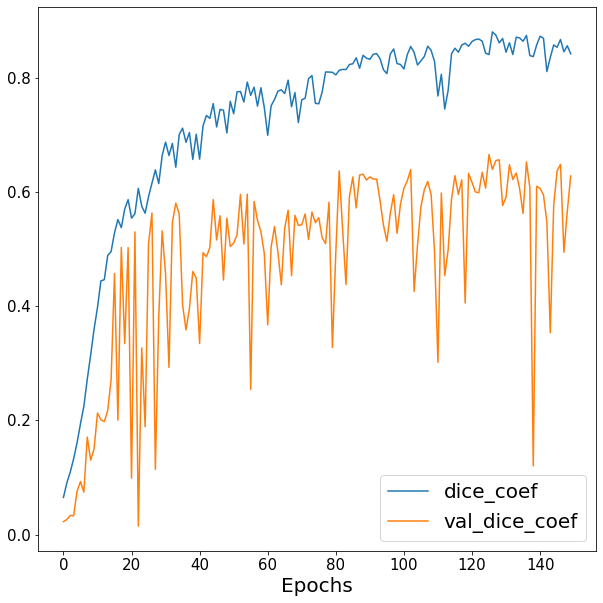

In [13]:
plt.figure(figsize=[10,10])
plt.plot(np.abs(hist.history['dice_coef']),label='dice_coef')
plt.plot(np.abs(hist.history['val_dice_coef']),label='val_dice_coef')
plt.legend(fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
#plt.ylabel('',fontsize=20)


plt.savefig(run_path + 'dicef_coef.png')

model.save_weights(run_path + 'model_' + run_name + '.h5')

In [12]:
model.save_weights('/storage/filament/result/cluster_3d/40Mpc/models/0122/model.hdf5')

In [14]:
img_val.shape

(32, 24, 96, 96, 1)

In [14]:
test = model.predict(img_val[:4,...])

test_array = np.array(test)

In [15]:
test_array = test_array.reshape([96,96,96])

In [26]:
os.getcwd()

'/storage/filament/result/cluster_3d/40Mpc/models/0121_v2'

In [17]:
save_dir = '/storage/filament/result/cluster_3d/40Mpc/models/0122/predict_result/'

for j in range(96):
        plt.figure(figsize=[30,30])
        plt.imsave(save_dir + str(j) +'.png',test_array[j,:,:],cmap='gray',dpi=300,format='png')


/home/ha/anaconda3/envs/research_filament/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 720x720 with 0 Axes>

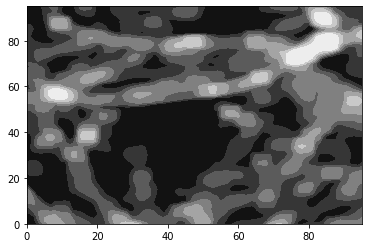

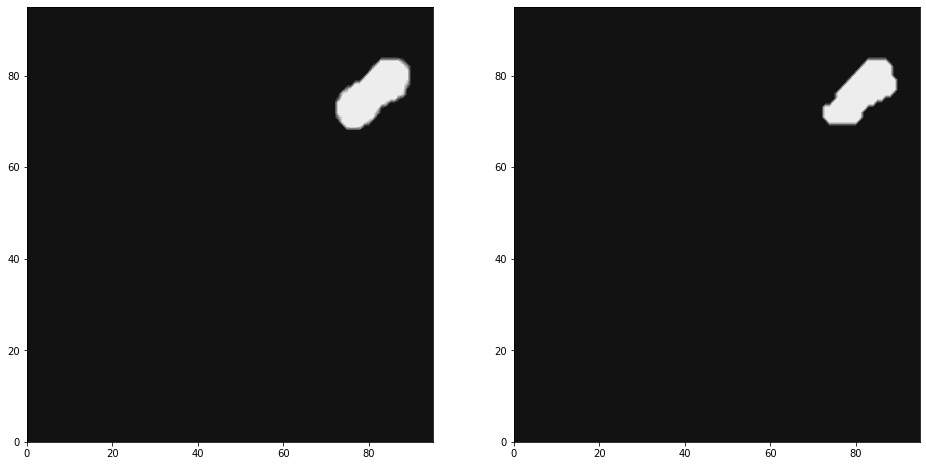

In [21]:
i = 3
j = 1
plt.figure(figsize=[10,10])
plt.show()
plt.contourf(img_val[i,j,:,:,0])
plt.figure(figsize=[16,8])
plt.subplot(121)
plt.contourf(test[i,j,:,:,0])
plt.gray()
plt.subplot(122)
plt.contourf(label_val[i,j,:,:,0])
plt.gray()

In [70]:
#img_val = img_file[:16,:,:,:,:]
save_dir = '/storage/filament/result/cluster_3d/40Mpc/prediction/aug_xyz_shuffle/'
# for i in range(test_re.shape[0]):
#     if not os.path.isdir(save_dir + str(i) +'/'):
#         os.makedirs(save_dir + str(i) +'/')
#     os.chdir(save_dir + str(i) +'/')
for j in range(test_re.shape[1]):
        plt.figure(figsize=[30,30])
        plt.imsave(str(j) +'.png',test_re[i,j,:,:],cmap='gray',dpi=300,format='png')


/home/ha/anaconda3/envs/research_filament/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

In [ ]:
model.load_weights('/storage/filament/result/cluster_3d/40Mpc/models/0121_v2/checkpoint_50--0.6250.hdf5')

In [10]:
val = model.predict(img_val)

In [55]:
os.chdir('/storage/filament/result/cluster_3d/40Mpc/prediction/aug_xyz/pic/')
for i in range(16):
    for j in range(24):
        plt.figure(figsize=[30,30])
        plt.imsave('i_' + str(i) + ' j_' + str(j) +'.png',test[i,j,:,:,0],cmap='gray',dpi=300,format='png')



/home/ha/anaconda3/envs/research_filament/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

In [ ]:
K